<a href="https://colab.research.google.com/github/rihabidm/EDA-for-online-transactions/blob/master/Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Data description

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product name. Nominal.

Quantity: The quantities of each product per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.


#Importing the dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pd.read_csv("data.csv", encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#Information about the data

In [ ]:
# Creating a new column called 'TotalPrice' that represents the total price for each transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#Data processing

##Missing values

In [ ]:
missing_description = df.loc[df.Description.isnull()]
missing_description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [ ]:
missing_description.UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##Canceled orders

In [ ]:
df['canceled'] = ['C' in str(x) for x in df['InvoiceNo']]
canceled_orders = df[df['canceled'] == True]
canceled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,True


In [ ]:
canceled_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8905 entries, 141 to 541717
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8905 non-null   object 
 1   StockCode    8905 non-null   object 
 2   Description  8905 non-null   object 
 3   Quantity     8905 non-null   int64  
 4   InvoiceDate  8905 non-null   object 
 5   UnitPrice    8905 non-null   float64
 6   CustomerID   8905 non-null   float64
 7   Country      8905 non-null   object 
 8   canceled     8905 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 634.8+ KB


##New dataframe with positive quantity

In [ ]:
df_clean = df[df['Quantity'] >= 0]
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
print("Total number of orders in the dataset:",df_clean['InvoiceNo'].nunique())
print("Total Number of customers:",df_clean['CustomerID'].nunique())

Total number of orders in the dataset: 20728
Total Number of customers: 4339


#EDA

##Visualizing the distribution of numerical columns using histograms

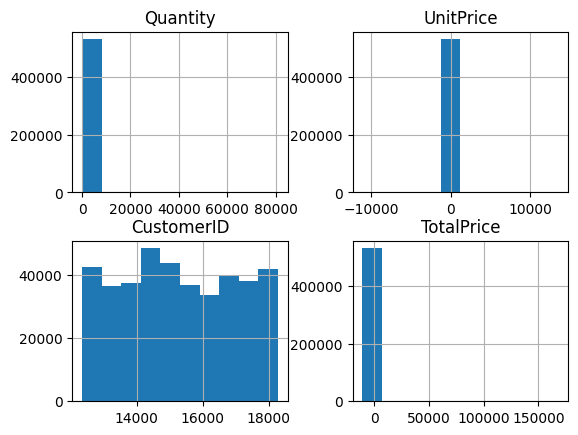

In [ ]:
df_clean.hist()
plt.show()

##The mean and total price for transactions

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  41.896667
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     35.907520
European Community       21.670833
Finland                  32.913985
France                   24.942330
Germany                  25.311562
Greece                   32.831172
Hong Kong                55.252817
Iceland                  23.681319
Israel                   27.577153
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.483078
RSA         

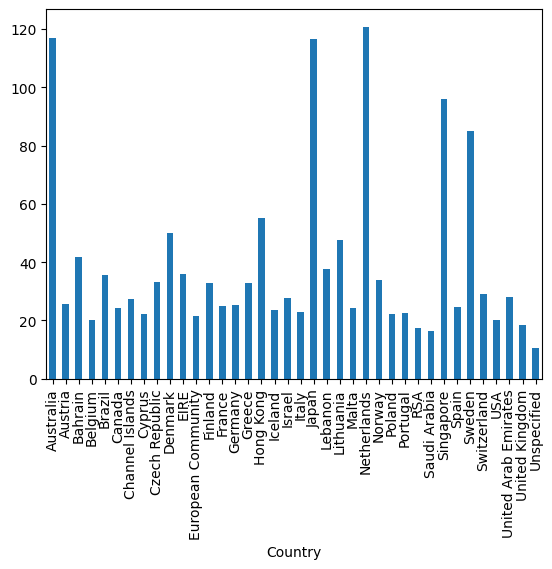

In [ ]:
# creating a new column called 'TotalPrice' that represents the total price for each transaction
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# grouping the data by country and computing the mean total price for each country
country_group = df_clean.groupby('Country')
mean_price_by_country = country_group['TotalPrice'].mean()
print(mean_price_by_country)

# Create a bar plot to visualize the mean total price for each country
mean_price_by_country.plot(kind='bar')
plt.show()

## Top 10 countries

                 TotalPrice
Country                    
United Kingdom  9003097.964
Netherlands      285446.340
EIRE             283453.960
Germany          228867.140
France           209715.110
Australia        138521.310
Spain             61577.110
Switzerland       57089.900
Belgium           41196.340
Sweden            38378.330


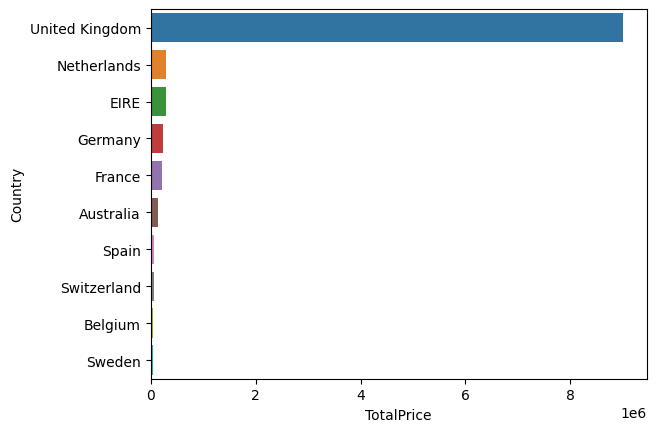

In [ ]:
# creating a new dataframe that contains only the 'Country' and 'TotalPrice' columns
df_countries = df_clean[['Country', 'TotalPrice']]

# grouping the data by country and summing the total price for each country
df_countries = df_countries.groupby('Country').sum()

# sorting the data by total price and display the top 10 countries
df_countries = df_countries.sort_values('TotalPrice', ascending=False)
print(df_countries.head(10))

# using the seaborn library to create a horizontal bar plot
sns.barplot(x='TotalPrice', y='Country', data=df_countries.reset_index().head(10), orient='h')

# showing the plot
plt.show()

##The average transaction value and quantity per transaction

Country
Netherlands    120.798282
Australia      116.895620
Japan          116.561900
Singapore       95.852658
Sweden          85.096075
Hong Kong       55.252817
Denmark         49.882474
Lithuania       47.458857
Bahrain         41.896667
Lebanon         37.641778
Name: TotalPrice, dtype: float64
Country
Netherlands       85.034702
Japan             81.046729
Sweden            80.006652
Australia         71.062447
Czech Republic    26.840000
Singapore         23.608108
Denmark           21.671053
EIRE              18.678363
Lithuania         18.628571
Canada            18.298013
Name: Quantity, dtype: float64


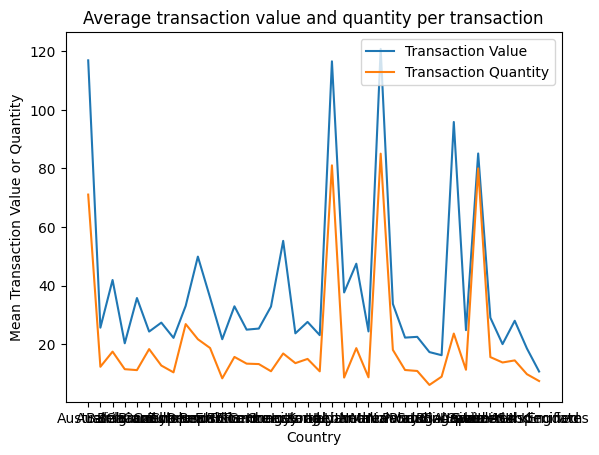

In [ ]:
# grouping the data by country and calculating the mean for the 'TotalPrice' and 'Quantity' columns
mean_price_by_country = df_clean.groupby('Country')['TotalPrice'].mean()
mean_quantity_by_country = df_clean.groupby('Country')['Quantity'].mean()
print(mean_price_by_country.sort_values(ascending=False).head(10))
print(mean_quantity_by_country.sort_values(ascending=False).head(10))

# using Seaborn to plot the mean transaction value and quantity
sns.lineplot(x=mean_price_by_country.index, y=mean_price_by_country.values, label='Transaction Value')
sns.lineplot(x=mean_quantity_by_country.index, y=mean_quantity_by_country.values, label='Transaction Quantity')
plt.title("Average transaction value and quantity per transaction")
plt.xlabel('Country')
plt.ylabel('Mean Transaction Value or Quantity')
plt.show()

##Which products have the highest sales, and in which countries

Description                         Country       
DOTCOM POSTAGE                      United Kingdom    206248.77
PAPER CRAFT , LITTLE BIRDIE         United Kingdom    168469.60
REGENCY CAKESTAND 3 TIER            United Kingdom    142273.29
WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom    100497.72
PARTY BUNTING                       United Kingdom     93658.53
JUMBO BAG RED RETROSPOT             United Kingdom     86471.34
MEDIUM CERAMIC TOP STORAGE JAR      United Kingdom     80575.63
PAPER CHAIN KIT 50'S CHRISTMAS      United Kingdom     62742.54
ASSORTED COLOUR BIRD ORNAMENT       United Kingdom     54756.79
CHILLI LIGHTS                       United Kingdom     53336.56
Name: TotalPrice, dtype: float64


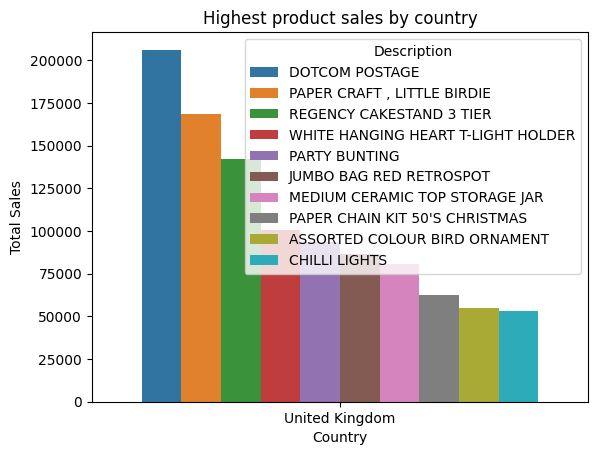

In [ ]:
# grouping the data by product and country and summing the total sales for each group
product_sales_by_country = df_clean.groupby(['Description', 'Country'])['TotalPrice'].sum()
print(product_sales_by_country.sort_values(ascending=False).head(10))

# using Seaborn to plot the top 10 products with the highest sales, along with the country where they had the highest sales
top_products = product_sales_by_country.sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='Country', y='TotalPrice', hue='Description', data=top_products)
plt.title("Highest product sales by country")
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

##the most popular products by sales

Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: TotalPrice, dtype: float64


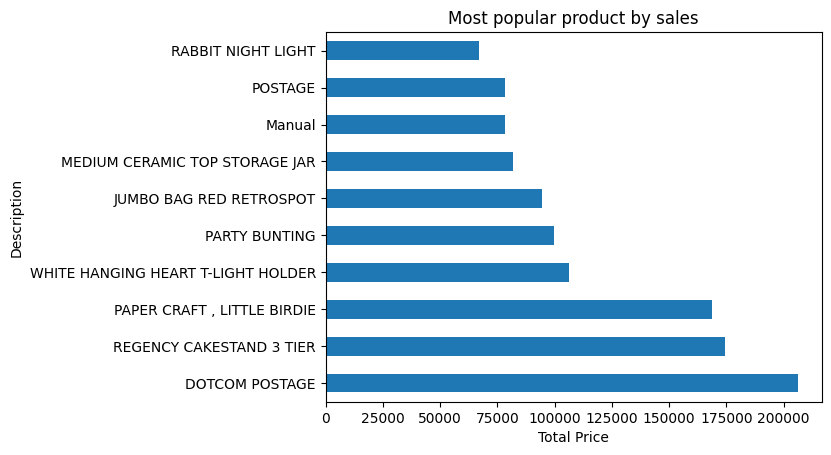

In [ ]:
# Grouping the data by product and summing the total sales for each product
product_sales = df_clean.groupby('Description')['TotalPrice'].sum()

# Sorting the data by total sales and selecting the top 10 products
top_products = product_sales.sort_values(ascending=False).head(10)
print(top_products)

# Ploting the data as a horizontal bar chart
top_products.plot(kind='barh')
plt.title("Most popular product by sales")
plt.xlabel("Total Price")
plt.show()